In [3]:
import pandas as pd
data = pd.read_csv('/Users/manaswini/Desktop/city_day.csv')
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [4]:
City=data.groupby(data.City)
Ahmedabad=City.get_group("Ahmedabad")
Ahmedabad

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,Ahmedabad,2020-06-27,62.12,118.67,9.18,56.35,19.86,NaN,0.49,12.44,68.05,1.32,37.76,1.62,92.0,Satisfactory
2005,Ahmedabad,2020-06-28,31.57,NaN,6.37,23.99,16.40,NaN,0.52,11.01,26.34,1.37,49.58,1.34,82.0,Satisfactory
2006,Ahmedabad,2020-06-29,29.75,127.98,9.06,25.15,18.92,NaN,0.67,12.10,34.99,1.39,60.21,0.79,74.0,Satisfactory
2007,Ahmedabad,2020-06-30,40.02,121.10,7.09,58.92,33.41,NaN,0.73,16.39,41.64,1.21,44.10,1.35,98.0,Satisfactory


In [5]:
Ahmedabad = Ahmedabad.drop(columns=['PM10'])
Ahmedabad

citynull = pd.isnull(Ahmedabad["City"])
Ahmedabad[citynull]

datenull = pd.isnull(Ahmedabad["Date"])
Ahmedabad[datenull]

for column in Ahmedabad[['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]:
    print(column)
    count = Ahmedabad[column].isna().sum()
    print((count/29463)*100)

Ahmedabad = Ahmedabad.drop(columns = ['Xylene', 'NH3'])
Ahmedabad

for column in Ahmedabad[['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']]:
    m = Ahmedabad[column].mean(skipna = True)
    print(column, m)
    Ahmedabad[column].fillna(m, inplace = True)

Ahmedabad

print(Ahmedabad['AQI'].mean(skipna = True))
Ahmedabad['AQI'].fillna(166, inplace = True)


Ahmedabad

Ahmedabad['AQI_Bucket'].value_counts()

Ahmedabad['AQI_Bucket'].fillna('Moderate', inplace = True)
Ahmedabad

Ahmedabad['Date'] = pd.to_datetime(Ahmedabad['Date'])

print(max(Ahmedabad['Date']),min(Ahmedabad['Date']))

temp=Ahmedabad.groupby(['AQI_Bucket']).mean()

temp = temp.sort_values(by=['AQI'])
temp

Ahmedabad['City'] = Ahmedabad['City'].str.lower()
Ahmedabad['AQI_Bucket'] = Ahmedabad['AQI_Bucket'].str.lower()
Ahmedabad

PM2.5
2.131486949733564
NO
2.066999287241625
NO2
2.063605199742049
NOx
2.016087974747989
NH3
6.818721786647659
CO
2.066999287241625
SO2
2.172215999728473
O3
2.3249499372093814
Benzene
1.639344262295082
Toluene
1.639344262295082
Xylene
1.6427383497946577
PM2.5 67.85449674149172
NO 22.42802142857145
NO2 59.0254960742327
NOx 47.36689752650181
CO 22.193407142857158
SO2 55.253732651570424
O3 39.155407854984865
Benzene 5.413807339449538
Toluene 27.740524246395903
452.12293853073464
2020-07-01 00:00:00 2015-01-01 00:00:00


,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,ahmedabad,2015-01-01,67.854497,0.92,18.22,17.15,0.92,27.64,133.36,0.00,0.02,166.0,moderate
1,ahmedabad,2015-01-02,67.854497,0.97,15.69,16.46,0.97,24.55,34.06,3.68,5.50,166.0,moderate
2,ahmedabad,2015-01-03,67.854497,17.40,19.30,29.70,17.40,29.07,30.70,6.80,16.40,166.0,moderate
3,ahmedabad,2015-01-04,67.854497,1.70,18.48,17.97,1.70,18.59,36.08,4.43,10.14,166.0,moderate
4,ahmedabad,2015-01-05,67.854497,22.10,21.42,37.76,22.10,39.33,39.31,7.01,18.89,166.0,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,ahmedabad,2020-06-27,62.120000,9.18,56.35,19.86,0.49,12.44,68.05,1.32,37.76,92.0,satisfactory
2005,ahmedabad,2020-06-28,31.570000,6.37,23.99,16.40,0.52,11.01,26.34,1.37,49.58,82.0,satisfactory
2006,ahmedabad,2020-06-29,29.750000,9.06,25.15,18.92,0.67,12.10,34.99,1.39,60.21,74.0,satisfactory
2007,ahmedabad,2020-06-30,40.020000,7.09,58.92,33.41,0.73,16.39,41.64,1.21,44.10,98.0,satisfactory


In [6]:
Amaravati=City.get_group("Amaravati")
Amaravati

Amaravati = Amaravati.drop(columns=['PM10'])
Amaravati

citynull = pd.isnull(Amaravati["City"])
Amaravati[citynull]

datenull = pd.isnull(Amaravati["Date"])
Amaravati[datenull]

for column in Amaravati[['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]:
    print(column)
    count = Amaravati[column].isna().sum()
    print((count/29463)*100)

Amaravati = Amaravati.drop(columns = ['Xylene', 'NH3'])
Amaravati

for column in Amaravati[['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']]:
    m = Amaravati[column].mean(skipna = True)
    print(column, m)
    Amaravati[column].fillna(m, inplace = True)

Amaravati

print(Amaravati['AQI'].mean(skipna = True))
Amaravati['AQI'].fillna(166, inplace = True)


Amaravati

Amaravati['AQI_Bucket'].value_counts()

Amaravati['AQI_Bucket'].fillna('Moderate', inplace = True)
Amaravati

Amaravati['Date'] = pd.to_datetime(Amaravati['Date'])

print(max(Amaravati['Date']),min(Amaravati['Date']))

temp=Amaravati.groupby(['AQI_Bucket']).mean()

temp = temp.sort_values(by=['AQI'])
temp

Amaravati['City'] = Amaravati['City'].str.lower()
Amaravati['AQI_Bucket'] = Amaravati['AQI_Bucket'].str.lower()
Amaravati

PM2.5
0.20025116247496863
NO
0.18667481247666565
NO2
0.18667481247666565
NOx
0.18667481247666565
NH3
0.18667481247666565
CO
0.3292264874588467
SO2
0.22061568747242305
O3
0.18667481247666565
Benzene
0.2545565624681804
Toluene
0.2545565624681804
Xylene
0.9130095373858739
PM2.5 37.77321748878925
NO 4.436071428571422
NO2 22.175747767857157
NOx 15.380412946428581
CO 0.6279039812646355
SO2 14.258340857787822
O3 38.11510044642858
Benzene 0.546415525114154
Toluene 1.877636986301371
95.29964328180738
2020-07-01 00:00:00 2017-11-24 00:00:00


,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
2122,amaravati,2017-11-24,71.36,1.75,20.65,12.40,0.10,10.76,109.26,0.17,5.92,166.0,moderate
2123,amaravati,2017-11-25,81.40,1.44,20.50,12.08,0.12,15.24,127.09,0.20,6.50,184.0,moderate
2124,amaravati,2017-11-26,78.32,1.26,26.00,14.85,0.14,26.96,117.44,0.22,7.95,197.0,moderate
2125,amaravati,2017-11-27,88.76,6.60,30.85,21.77,0.11,33.59,111.81,0.29,7.63,198.0,moderate
2126,amaravati,2017-11-28,64.18,2.56,28.07,17.01,0.09,19.00,138.18,0.17,5.02,188.0,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3068,amaravati,2020-06-27,14.50,1.53,6.53,4.72,0.55,13.75,33.76,0.06,0.27,42.0,good
3069,amaravati,2020-06-28,16.65,1.43,8.32,5.59,0.66,10.86,37.34,0.10,0.43,49.0,good
3070,amaravati,2020-06-29,20.96,1.65,9.55,6.43,0.66,14.79,43.29,0.12,0.69,56.0,satisfactory
3071,amaravati,2020-06-30,21.34,1.74,10.69,7.10,0.66,14.58,45.32,0.14,1.42,61.0,satisfactory


In [7]:
Amritsar=City.get_group("Amritsar")
Amritsar

Amritsar = Amritsar.drop(columns=['PM10'])
Amritsar

citynull = pd.isnull(Amritsar["City"])
Amritsar[citynull]

datenull = pd.isnull(Amritsar["Date"])
Amritsar[datenull]

for column in Amritsar[['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]:
    print(column)
    count = Amritsar[column].isna().sum()
    print((count/29463)*100)

Amritsar = Amritsar.drop(columns = ['Xylene', 'NH3'])
Amritsar

for column in Amritsar[['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']]:
    m = Amritsar[column].mean(skipna = True)
    print(column, m)
    Amritsar[column].fillna(m, inplace = True)

Amritsar

print(Amritsar['AQI'].mean(skipna = True))
Amritsar['AQI'].fillna(166, inplace = True)


Amritsar

Amritsar['AQI_Bucket'].value_counts()

Amritsar['AQI_Bucket'].fillna('Moderate', inplace = True)
Amritsar

Amritsar['Date'] = pd.to_datetime(Amritsar['Date'])

print(max(Amritsar['Date']),min(Amritsar['Date']))

temp=Amritsar.groupby(['AQI_Bucket']).mean()

temp = temp.sort_values(by=['AQI'])
temp

Amritsar['City'] = Amritsar['City'].str.lower()
Amritsar['AQI_Bucket'] = Amritsar['AQI_Bucket'].str.lower()
Amritsar

PM2.5
0.43444319994569464
NO
0.3156501374605437
NO2
0.1493398499813325
NOx
0.9808912873773886
NH3
0.14255167498218105
CO
0.25795064996775613
SO2
0.5702066999287242
O3
0.39032006245121
Benzene
0.6618470624172691
Toluene
0.7195465499100567
Xylene
0.7229406374096324
PM2.5 55.468334858188456
NO 18.727925531914867
NO2 18.5221155480034
NOx 35.64829399141628
CO 0.5513013100436684
SO2 8.148917378917375
O3 22.41614828209768
Benzene 4.182290448343083
Toluene 3.036263627353808
119.92095914742451
2020-07-01 00:00:00 2017-02-27 00:00:00


,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
3073,amritsar,2017-02-27,13.42,15.06,8.86,35.648294,0.81,11.00,12.96,4.18229,3.036264,166.0,moderate
3074,amritsar,2017-02-28,12.45,17.44,8.05,35.648294,0.67,16.06,11.88,4.18229,3.036264,52.0,satisfactory
3075,amritsar,2017-03-01,19.52,14.77,6.02,35.648294,0.43,26.24,11.53,4.18229,3.036264,31.0,good
3076,amritsar,2017-03-02,77.71,10.49,3.88,35.648294,0.36,22.35,18.68,4.18229,3.036264,106.0,moderate
3077,amritsar,2017-03-03,19.70,9.91,3.13,35.648294,0.37,14.29,22.22,4.18229,3.036264,98.0,satisfactory
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4289,amritsar,2020-06-27,51.10,25.25,20.80,35.750000,0.66,4.55,16.48,1.30000,1.100000,74.0,satisfactory
4290,amritsar,2020-06-28,45.24,23.11,17.90,27.470000,0.63,5.22,16.48,1.16000,0.980000,85.0,satisfactory
4291,amritsar,2020-06-29,26.77,26.99,19.83,34.030000,0.67,4.89,16.48,1.30000,1.100000,49.0,good
4292,amritsar,2020-06-30,41.64,22.03,15.97,30.600000,0.69,4.67,16.48,1.30000,1.100000,66.0,satisfactory


In [8]:
Bengaluru=City.get_group("Bengaluru")
Bengaluru

Bengaluru = Bengaluru.drop(columns=['PM10'])
Bengaluru

citynull = pd.isnull(Bengaluru["City"])
Bengaluru[citynull]

datenull = pd.isnull(Bengaluru["Date"])
Bengaluru[datenull]

for column in Bengaluru[['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]:
    print(column)
    count = Bengaluru[column].isna().sum()
    print((count/29463)*100)

Bengaluru = Bengaluru.drop(columns = ['Xylene', 'NH3'])
Bengaluru

for column in Bengaluru[['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']]:
    m = Bengaluru[column].mean(skipna = True)
    print(column, m)
    Bengaluru[column].fillna(m, inplace = True)

Bengaluru

print(Bengaluru['AQI'].mean(skipna = True))
Bengaluru['AQI'].fillna(166, inplace = True)


Bengaluru

Bengaluru['AQI_Bucket'].value_counts()

Bengaluru['AQI_Bucket'].fillna('Moderate', inplace = True)
Bengaluru

Bengaluru['Date'] = pd.to_datetime(Bengaluru['Date'])

print(max(Bengaluru['Date']),min(Bengaluru['Date']))

temp=Bengaluru.groupby(['AQI_Bucket']).mean()

temp = temp.sort_values(by=['AQI'])
temp

Bengaluru['City'] = Bengaluru['City'].str.lower()
Bengaluru['AQI_Bucket'] = Bengaluru['AQI_Bucket'].str.lower()
Bengaluru

PM2.5
0.49553677493805787
NO
0.020364524997454433
NO2
0.020364524997454433
NOx
0.013576349998302957
NH3
0.6889997624138751
CO
0.03733496249533313
SO2
0.020364524997454433
O3
0.4887485999389064
Benzene
0.9028272748871465
Toluene
0.3156501374605437
Xylene
6.818721786647659
PM2.5 35.81982823403109
NO 9.409136295556674
NO2 27.995042436345486
NOx 19.717092269326685
CO 1.8386336336336362
SO2 5.5190214677983
O3 32.86808579088473
Benzene 3.2225530694205324
Toluene 4.753194154488517
94.31832460732984
2020-07-01 00:00:00 2015-01-01 00:00:00


,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
4294,bengaluru,2015-01-01,35.819828,3.26,17.33,10.88,0.33,3.54,10.73,0.56,4.64,166.0,moderate
4295,bengaluru,2015-01-02,35.819828,6.05,19.73,14.14,1.35,3.97,22.77,0.65,5.31,166.0,moderate
4296,bengaluru,2015-01-03,35.819828,11.91,19.88,20.72,17.40,13.61,12.03,0.53,19.25,166.0,moderate
4297,bengaluru,2015-01-04,35.819828,7.45,21.61,16.88,5.05,6.52,17.70,0.55,7.47,166.0,moderate
4298,bengaluru,2015-01-05,35.819828,9.52,22.17,21.76,1.83,4.71,12.72,0.40,4.36,166.0,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6298,bengaluru,2020-06-27,16.600000,3.06,13.68,13.07,0.67,7.29,15.69,0.21,1.18,51.0,satisfactory
6299,bengaluru,2020-06-28,20.440000,2.69,10.33,10.58,0.66,6.60,17.59,0.12,0.94,61.0,satisfactory
6300,bengaluru,2020-06-29,28.680000,3.62,12.12,12.94,0.56,6.33,16.99,0.17,1.17,65.0,satisfactory
6301,bengaluru,2020-06-30,14.470000,4.61,12.69,15.00,0.56,6.45,16.08,0.18,0.86,63.0,satisfactory


In [9]:
Brajrajnagar=City.get_group("Brajrajnagar")
Brajrajnagar

Brajrajnagar = Brajrajnagar.drop(columns=['PM10'])
Brajrajnagar

citynull = pd.isnull(Brajrajnagar["City"])
Brajrajnagar[citynull]

datenull = pd.isnull(Brajrajnagar["Date"])
Brajrajnagar[datenull]

for column in Brajrajnagar[['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]:
    print(column)
    count = Brajrajnagar[column].isna().sum()
    print((count/29463)*100)

Brajrajnagar = Brajrajnagar.drop(columns = ['Xylene', 'NH3'])
Brajrajnagar

for column in Brajrajnagar[['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']]:
    m = Brajrajnagar[column].mean(skipna = True)
    print(column, m)
    Brajrajnagar[column].fillna(m, inplace = True)

Brajrajnagar

print(Brajrajnagar['AQI'].mean(skipna = True))
Brajrajnagar['AQI'].fillna(166, inplace = True)


Brajrajnagar

Brajrajnagar['AQI_Bucket'].value_counts()

Brajrajnagar['AQI_Bucket'].fillna('Moderate', inplace = True)
Brajrajnagar

Brajrajnagar['Date'] = pd.to_datetime(Brajrajnagar['Date'])

print(max(Brajrajnagar['Date']),min(Brajrajnagar['Date']))

temp=Brajrajnagar.groupby(['AQI_Bucket']).mean()

temp = temp.sort_values(by=['AQI'])
temp

Brajrajnagar['City'] = Brajrajnagar['City'].str.lower()
Brajrajnagar['AQI_Bucket'] = Brajrajnagar['AQI_Bucket'].str.lower()
Brajrajnagar

PM2.5
0.6279061874215117
NO
0.8247632623969046
NO2
0.7942164749007229
NOx
0.5939653124257543
NH3
0.767063774904117
CO
0.5091131249363609
SO2
0.6550588874181177
O3
0.6889997624138751
Benzene
0.5871771374266028
Toluene
3.183654074602043
Xylene
3.183654074602043
PM2.5 64.05760956175307
NO 17.301812949640276
NO2 16.52053977272729
NOx 24.542647444298808
CO 1.7982741116751257
SO2 9.783221476510072
O3 16.59965986394557
Benzene 4.842562091503271
Toluene nan
150.2805049088359
2020-07-01 00:00:00 2017-12-07 00:00:00


,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
6592,brajrajnagar,2017-12-07,171.38000,17.301813,41.07000,24.542647,3.260000,5.830000,4.69000,0.000000,NaN,166.0,moderate
6593,brajrajnagar,2017-12-08,126.67000,17.301813,20.16000,24.542647,2.940000,5.430000,10.51000,0.000000,NaN,304.0,very poor
6594,brajrajnagar,2017-12-09,105.11000,17.301813,18.40000,24.542647,2.830000,5.100000,10.33000,0.000000,NaN,291.0,poor
6595,brajrajnagar,2017-12-10,65.25000,17.301813,15.21000,24.542647,2.740000,4.750000,8.37000,0.000000,NaN,189.0,moderate
6596,brajrajnagar,2017-12-11,64.05761,17.301813,16.52054,24.542647,1.798274,9.783221,16.59966,4.842562,NaN,166.0,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7525,brajrajnagar,2020-06-27,64.05761,17.301813,16.52054,24.542647,1.798274,9.783221,16.59966,4.842562,NaN,166.0,moderate
7526,brajrajnagar,2020-06-28,64.05761,17.301813,16.52054,24.542647,1.798274,9.783221,16.59966,4.842562,NaN,166.0,moderate
7527,brajrajnagar,2020-06-29,64.05761,17.301813,16.52054,24.542647,1.798274,9.783221,16.59966,4.842562,NaN,166.0,moderate
7528,brajrajnagar,2020-06-30,64.05761,17.301813,16.52054,24.542647,1.798274,9.783221,16.59966,4.842562,NaN,166.0,moderate


In [10]:
Chennai=City.get_group("Chennai")
Chennai

Chennai = Chennai.drop(columns=['PM10'])
Chennai

citynull = pd.isnull(Chennai["City"])
Chennai[citynull]

datenull = pd.isnull(Chennai["Date"])
Chennai[datenull]

for column in Chennai[['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]:
    print(column)
    count = Chennai[column].isna().sum()
    print((count/29463)*100)

Chennai = Chennai.drop(columns = ['Xylene', 'NH3'])
Chennai

for column in Chennai[['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']]:
    m = Chennai[column].mean(skipna = True)
    print(column, m)
    Chennai[column].fillna(m, inplace = True)

Chennai

print(Chennai['AQI'].mean(skipna = True))
Chennai['AQI'].fillna(166, inplace = True)


Chennai

Chennai['AQI_Bucket'].value_counts()

Chennai['AQI_Bucket'].fillna('Moderate', inplace = True)
Chennai

Chennai['Date'] = pd.to_datetime(Chennai['Date'])

print(max(Chennai['Date']),min(Chennai['Date']))

temp=Chennai.groupby(['AQI_Bucket']).mean()

temp = temp.sort_values(by=['AQI'])
temp

Chennai['City'] = Chennai['City'].str.lower()
Chennai['AQI_Bucket'] = Chennai['AQI_Bucket'].str.lower()
Chennai

PM2.5
0.39710823745036145
NO
0.1221871499847266
NO2
0.1221871499847266
NOx
0.1221871499847266
NH3
1.5680684248039916
CO
0.08485218748939347
SO2
0.1221871499847266
O3
0.1663102874792112
Benzene
0.9673149373790857
Toluene
0.858704137392662
Xylene
6.818721786647659
PM2.5 50.425613107822414
NO 9.190562595032926
NO2 16.857622909275207
NOx 17.667942219969564
CO 1.0673487903225722
SO2 7.87718195641157
O3 32.443816326530595
Benzene 1.7092053364269306
Toluene 2.595666287015953
114.50265392781316
2020-07-01 00:00:00 2015-01-01 00:00:00


,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
7834,chennai,2015-01-01,50.425613,16.30,15.39,22.68,1.17,9.20,11.35,0.170000,2.595666,166.0,moderate
7835,chennai,2015-01-02,50.425613,16.49,13.42,23.09,1.23,8.61,9.16,0.130000,2.595666,166.0,moderate
7836,chennai,2015-01-03,50.425613,9.72,19.56,9.99,0.77,48.23,13.45,0.030000,2.595666,166.0,moderate
7837,chennai,2015-01-04,50.425613,9.60,16.20,11.71,1.00,27.96,10.33,1.709205,2.595666,166.0,moderate
7838,chennai,2015-01-05,50.425613,9.16,16.30,12.94,0.90,16.60,9.36,1.709205,2.595666,166.0,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9838,chennai,2020-06-27,26.420000,7.25,12.96,19.59,1.10,7.29,68.51,0.100000,0.070000,95.0,satisfactory
9839,chennai,2020-06-28,25.930000,7.81,10.00,16.39,0.76,6.48,77.45,0.090000,0.000000,98.0,satisfactory
9840,chennai,2020-06-29,21.300000,7.65,9.69,16.74,0.96,6.62,62.57,0.090000,0.010000,104.0,moderate
9841,chennai,2020-06-30,24.140000,8.42,12.38,20.29,1.05,7.50,68.75,0.170000,0.160000,110.0,moderate


In [11]:
Delhi=City.get_group("Delhi")
Delhi

Delhi = Delhi.drop(columns=['PM10'])
Delhi

citynull = pd.isnull(Delhi["City"])
Delhi[citynull]

datenull = pd.isnull(Delhi["Date"])
Delhi[datenull]

for column in Delhi[['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]:
    print(column)
    count = Delhi[column].isna().sum()
    print((count/29463)*100)

Delhi = Delhi.drop(columns = ['Xylene', 'NH3'])
Delhi

for column in Delhi[['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']]:
    m = Delhi[column].mean(skipna = True)
    print(column, m)
    Delhi[column].fillna(m, inplace = True)

Delhi

print(Delhi['AQI'].mean(skipna = True))
Delhi['AQI'].fillna(166, inplace = True)


Delhi

Delhi['AQI_Bucket'].value_counts()

Delhi['AQI_Bucket'].fillna('Moderate', inplace = True)
Delhi

Delhi['Date'] = pd.to_datetime(Delhi['Date'])

print(max(Delhi['Date']),min(Delhi['Date']))

temp=Delhi.groupby(['AQI_Bucket']).mean()

temp = temp.sort_values(by=['AQI'])
temp

Delhi['City'] = Delhi['City'].str.lower()
Delhi['AQI_Bucket'] = Delhi['AQI_Bucket'].str.lower()
Delhi

PM2.5
0.006788174999151479
NO
0.006788174999151479
NO2
0.006788174999151479
NOx
0.0
NH3
0.03054678749618165
CO
0.0
SO2
0.3733496249533313
O3
0.2851033499643621
Benzene
0.0
Toluene
0.0
Xylene
2.650782337168652
PM2.5 117.19615346287999
NO 38.98559541604395
NO2 50.785181863477845
NOx 58.56702339472371
CO 1.9760527625684374
SO2 15.901253291205885
O3 51.32361038961032
Benzene 3.544479840716772
Toluene 17.185042309606786
259.48774387193595
2020-07-01 00:00:00 2015-01-01 00:00:00


,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
10229,delhi,2015-01-01,313.22,69.16,36.39,110.59,15.20,9.25,41.68,14.36,24.86,472.0,severe
10230,delhi,2015-01-02,186.18,62.09,32.87,88.14,9.54,6.65,29.97,10.55,20.09,454.0,severe
10231,delhi,2015-01-03,87.18,25.73,30.31,47.95,10.61,2.65,19.71,3.91,10.23,143.0,moderate
10232,delhi,2015-01-04,151.84,25.01,36.91,48.62,11.54,4.63,25.36,4.26,9.71,319.0,very poor
10233,delhi,2015-01-05,146.60,14.01,34.92,38.25,9.20,3.33,23.20,2.80,6.21,325.0,very poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,delhi,2020-06-27,39.80,10.88,21.46,22.47,0.87,10.38,18.88,1.69,19.99,112.0,moderate
12234,delhi,2020-06-28,59.52,12.67,21.60,23.86,0.94,10.70,18.05,1.71,25.13,196.0,moderate
12235,delhi,2020-06-29,44.86,10.50,21.57,21.94,0.88,11.58,26.61,2.13,23.80,233.0,poor
12236,delhi,2020-06-30,39.80,5.99,17.96,15.44,0.84,10.51,37.29,1.57,16.37,114.0,moderate


In [12]:
Gurugram=City.get_group("Gurugram")
Gurugram

Gurugram = Gurugram.drop(columns=['PM10'])
Gurugram

citynull = pd.isnull(Gurugram["City"])
Gurugram[citynull]

datenull = pd.isnull(Gurugram["Date"])
Gurugram[datenull]

for column in Gurugram[['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]:
    print(column)
    count = Gurugram[column].isna().sum()
    print((count/29463)*100)

Gurugram = Gurugram.drop(columns = ['Xylene', 'NH3'])
Gurugram

for column in Gurugram[['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']]:
    m = Gurugram[column].mean(skipna = True)
    print(column, m)
    Gurugram[column].fillna(m, inplace = True)

Gurugram

print(Gurugram['AQI'].mean(skipna = True))
Gurugram['AQI'].fillna(166, inplace = True)


Gurugram

Gurugram['AQI_Bucket'].value_counts()

Gurugram['AQI_Bucket'].fillna('Moderate', inplace = True)
Gurugram

Gurugram['Date'] = pd.to_datetime(Gurugram['Date'])

print(max(Gurugram['Date']),min(Gurugram['Date']))

temp=Gurugram.groupby(['AQI_Bucket']).mean()

temp = temp.sort_values(by=['AQI'])
temp

Gurugram['City'] = Gurugram['City'].str.lower()
Gurugram['AQI_Bucket'] = Gurugram['AQI_Bucket'].str.lower()
Gurugram

PM2.5
0.5226894749346638
NO
0.468384074941452
NO2
0.4615958999423005
NOx
1.534127549808234
NH3
5.294776499338153
CO
0.3699555374537556
SO2
0.5939653124257543
O3
0.3937141499507858
Benzene
1.5001866748124766
Toluene
2.070393374741201
Xylene
5.294776499338153
PM2.5 117.10400655737696
NO 17.534282933160284
NO2 23.378165910563816
NOx 29.3773105134474
CO 1.2575159235668785
SO2 9.41970079787235
O3 34.40937300063977
Benzene 1.7241713823767162
Toluene 5.7807109448082326
225.12388162422573
2020-07-01 00:00:00 2015-11-27 00:00:00


,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
12400,gurugram,2015-11-27,117.104007,5.28,8.37,9.57,2.88,15.92,5.96,1.724171,5.780711,166.0,moderate
12401,gurugram,2015-11-28,117.104007,4.71,8.00,9.74,0.47,5.78,8.13,1.724171,5.780711,166.0,moderate
12402,gurugram,2015-11-29,117.104007,3.10,8.04,8.69,1.67,5.26,16.52,1.724171,5.780711,166.0,moderate
12403,gurugram,2015-11-30,117.104007,3.90,8.21,9.54,1.45,7.51,6.29,1.724171,5.780711,166.0,moderate
12404,gurugram,2015-12-01,117.104007,3.36,8.13,8.86,1.45,3.72,10.50,1.724171,5.780711,166.0,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14074,gurugram,2020-06-27,47.820000,3.12,8.05,7.24,0.66,9.18,19.54,2.160000,4.780000,121.0,moderate
14075,gurugram,2020-06-28,64.720000,5.62,9.65,8.97,0.67,7.82,17.28,2.650000,3.590000,153.0,moderate
14076,gurugram,2020-06-29,46.890000,4.00,8.97,9.65,0.57,7.86,36.50,2.340000,3.840000,140.0,moderate
14077,gurugram,2020-06-30,47.270000,6.29,10.38,12.08,0.78,7.36,58.07,2.400000,4.300000,131.0,moderate


In [13]:
Hyderabad=City.get_group("Hyderabad")
Hyderabad

Hyderabad = Hyderabad.drop(columns=['PM10'])
Hyderabad

citynull = pd.isnull(Hyderabad["City"])
Hyderabad[citynull]

datenull = pd.isnull(Hyderabad["Date"])
Hyderabad[datenull]

for column in Hyderabad[['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]:
    print(column)
    count = Hyderabad[column].isna().sum()
    print((count/29463)*100)

Hyderabad = Hyderabad.drop(columns = ['Xylene', 'NH3'])
Hyderabad

for column in Hyderabad[['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']]:
    m = Hyderabad[column].mean(skipna = True)
    print(column, m)
    Hyderabad[column].fillna(m, inplace = True)

Hyderabad

print(Hyderabad['AQI'].mean(skipna = True))
Hyderabad['AQI'].fillna(166, inplace = True)


Hyderabad

Hyderabad['AQI_Bucket'].value_counts()

Hyderabad['AQI_Bucket'].fillna('Moderate', inplace = True)
Hyderabad

Hyderabad['Date'] = pd.to_datetime(Hyderabad['Date'])

print(max(Hyderabad['Date']),min(Hyderabad['Date']))

temp=Hyderabad.groupby(['AQI_Bucket']).mean()

temp = temp.sort_values(by=['AQI'])
temp

Hyderabad['City'] = Hyderabad['City'].str.lower()
Hyderabad['AQI_Bucket'] = Hyderabad['AQI_Bucket'].str.lower()
Hyderabad

PM2.5
0.39032006245121
NO
0.09503444998812069
NO2
0.09503444998812069
NOx
0.023758612497030172
NH3
1.2218714998472662
CO
0.016970437497878695
SO2
0.08824627498896923
O3
0.08824627498896923
Benzene
0.4310491124461188
Toluene
0.4310491124461188
Xylene
0.4310491124461188
PM2.5 47.03535695399267
NO 7.817194135490368
NO2 28.38675429726997
NOx 19.438754377188616
CO 0.5907796101949023
SO2 9.173712121212121
O3 33.611005050505085
Benzene 1.1733528472591814
Toluene 7.874550292708891
109.20744680851064
2020-07-01 00:00:00 2015-01-04 00:00:00


,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
14581,hyderabad,2015-01-04,47.035357,3.70,17.19,20.89,0.30,2.58,30.34,0.41,6.15,166.0,moderate
14582,hyderabad,2015-01-05,47.035357,3.61,9.69,13.30,0.23,5.19,31.28,0.39,7.22,166.0,moderate
14583,hyderabad,2015-01-06,47.035357,4.21,22.02,26.23,0.31,9.09,28.56,0.52,5.14,166.0,moderate
14584,hyderabad,2015-01-07,47.035357,26.08,40.08,66.15,0.53,9.03,31.08,1.92,16.35,166.0,moderate
14585,hyderabad,2015-01-08,47.035357,10.31,33.02,43.33,0.44,8.47,35.72,1.89,14.27,166.0,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16582,hyderabad,2020-06-27,23.290000,6.38,22.64,15.39,0.36,5.39,24.22,0.88,6.72,58.0,satisfactory
16583,hyderabad,2020-06-28,15.800000,5.79,22.73,14.89,0.36,6.36,22.25,0.82,6.48,49.0,good
16584,hyderabad,2020-06-29,20.240000,3.96,27.59,17.09,0.38,6.29,19.98,1.31,10.83,47.0,good
16585,hyderabad,2020-06-30,19.380000,2.63,24.58,14.59,0.39,5.30,17.40,1.45,13.07,46.0,good


In [14]:
Jaipur=City.get_group("Jaipur")
Jaipur

Jaipur = Jaipur.drop(columns=['PM10'])
Jaipur

citynull = pd.isnull(Jaipur["City"])
Jaipur[citynull]

datenull = pd.isnull(Jaipur["Date"])
Jaipur[datenull]

for column in Jaipur[['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]:
    print(column)
    count = Jaipur[column].isna().sum()
    print((count/29463)*100)

Jaipur = Jaipur.drop(columns = ['Xylene', 'NH3'])
Jaipur

for column in Jaipur[['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']]:
    m = Jaipur[column].mean(skipna = True)
    print(column, m)
    Jaipur[column].fillna(m, inplace = True)

Jaipur

print(Jaipur['AQI'].mean(skipna = True))
Jaipur['AQI'].fillna(166, inplace = True)


Jaipur

Jaipur['AQI_Bucket'].value_counts()

Jaipur['AQI_Bucket'].fillna('Moderate', inplace = True)
Jaipur

Jaipur['Date'] = pd.to_datetime(Jaipur['Date'])

print(max(Jaipur['Date']),min(Jaipur['Date']))

temp=Jaipur.groupby(['AQI_Bucket']).mean()

temp = temp.sort_values(by=['AQI'])
temp

Jaipur['City'] = Jaipur['City'].str.lower()
Jaipur['AQI_Bucket'] = Jaipur['AQI_Bucket'].str.lower()
Jaipur

PM2.5
0.04072904999490887
NO
0.05430539999321183
NO2
0.047517224994060345
NOx
0.38013779995248276
NH3
0.05091131249363609
CO
0.023758612497030172
SO2
0.04072904999490887
O3
0.05091131249363609
Benzene
0.07466992499066626
Toluene
0.078064012490242
Xylene
3.7810134745273736
PM2.5 54.5007078039928
NO 14.632987249544634
NO2 32.418627272727264
NOx 39.63717564870251
CO 0.800894308943089
SO2 11.0710617059891
O3 46.71546860782531
Benzene 1.5711721611721605
Toluene 6.685572868927594
133.67915904936015
2020-07-01 00:00:00 2017-06-14 00:00:00


,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
16587,jaipur,2017-06-14,54.500708,14.632987,32.418627,39.637176,0.800894,11.071062,46.715469,1.571172,6.685573,166.0,moderate
16588,jaipur,2017-06-15,54.500708,14.632987,32.418627,39.637176,0.800894,11.071062,46.715469,1.571172,6.685573,166.0,moderate
16589,jaipur,2017-06-16,54.500708,14.632987,32.418627,39.637176,0.800894,11.071062,46.715469,1.571172,6.685573,166.0,moderate
16590,jaipur,2017-06-17,54.500708,14.632987,32.418627,39.637176,0.800894,11.071062,46.715469,1.571172,6.685573,166.0,moderate
16591,jaipur,2017-06-18,54.500708,14.632987,32.418627,39.637176,0.800894,11.071062,46.715469,1.571172,6.685573,166.0,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17696,jaipur,2020-06-27,28.330000,6.150000,14.720000,18.140000,0.590000,9.960000,39.120000,0.230000,0.590000,89.0,satisfactory
17697,jaipur,2020-06-28,23.760000,5.600000,14.050000,17.200000,0.500000,8.930000,34.400000,0.160000,0.390000,75.0,satisfactory
17698,jaipur,2020-06-29,30.580000,6.210000,16.630000,19.500000,0.550000,10.590000,39.210000,0.220000,0.470000,69.0,satisfactory
17699,jaipur,2020-06-30,30.030000,5.480000,13.770000,16.940000,0.670000,10.360000,50.710000,0.480000,1.480000,79.0,satisfactory


In [15]:
Jorapokhar=City.get_group("Jorapokhar")
Jorapokhar

Jorapokhar = Jorapokhar.drop(columns=['PM10'])
Jorapokhar

citynull = pd.isnull(Jorapokhar["City"])
Jorapokhar[citynull]

datenull = pd.isnull(Jorapokhar["Date"])
Jorapokhar[datenull]

for column in Jorapokhar[['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]:
    print(column)
    count = Jorapokhar[column].isna().sum()
    print((count/29463)*100)

Jorapokhar = Jorapokhar.drop(columns = ['Xylene', 'NH3'])
Jorapokhar

for column in Jorapokhar[['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']]:
    m = Jorapokhar[column].mean(skipna = True)
    print(column, m)
    Jorapokhar[column].fillna(m, inplace = True)

Jorapokhar

print(Jorapokhar['AQI'].mean(skipna = True))
Jorapokhar['AQI'].fillna(166, inplace = True)


Jorapokhar

Jorapokhar['AQI_Bucket'].value_counts()

Jorapokhar['AQI_Bucket'].fillna('Moderate', inplace = True)
Jorapokhar

Jorapokhar['Date'] = pd.to_datetime(Jorapokhar['Date'])

print(max(Jorapokhar['Date']),min(Jorapokhar['Date']))

temp=Jorapokhar.groupby(['AQI_Bucket']).mean()

temp = temp.sort_values(by=['AQI'])
temp

Jorapokhar['City'] = Jorapokhar['City'].str.lower()
Jorapokhar['AQI_Bucket'] = Jorapokhar['AQI_Bucket'].str.lower()
Jorapokhar

PM2.5
2.681329124664834
NO
0.9164036248854495
NO2
0.9164036248854495
NOx
3.967688287004039
NH3
1.249024199843872
CO
1.741166887282354
SO2
1.1913247123510844
O3
0.9978617248752674
Benzene
3.967688287004039
Toluene
3.967688287004039
Xylene
3.967688287004039
PM2.5 64.22891820580477
NO 11.015183537263617
NO2 9.342947719688539
NOx nan
CO 0.6630487804878046
SO2 33.64518337408316
O3 32.42305142857144
Benzene nan
Toluene nan
159.25162127107652
2020-07-01 00:00:00 2017-04-20 00:00:00


,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
17701,jorapokhar,2017-04-20,64.228918,7.75,9.26,NaN,0.32,28.43,18.88,NaN,NaN,166.0,moderate
17702,jorapokhar,2017-04-21,64.228918,8.00,10.20,NaN,0.27,29.35,15.85,NaN,NaN,148.0,moderate
17703,jorapokhar,2017-04-22,64.228918,7.92,9.45,NaN,0.29,33.34,17.76,NaN,NaN,135.0,moderate
17704,jorapokhar,2017-04-23,64.228918,7.74,9.39,NaN,0.31,34.10,21.71,NaN,NaN,107.0,moderate
17705,jorapokhar,2017-04-24,64.228918,7.49,10.72,NaN,0.33,38.16,17.94,NaN,NaN,124.0,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18865,jorapokhar,2020-06-27,64.228918,23.88,11.32,NaN,1.73,25.84,87.92,NaN,NaN,203.0,poor
18866,jorapokhar,2020-06-28,64.228918,25.44,10.63,NaN,1.87,23.11,69.95,NaN,NaN,156.0,moderate
18867,jorapokhar,2020-06-29,64.228918,24.73,11.96,NaN,1.65,24.05,57.76,NaN,NaN,135.0,moderate
18868,jorapokhar,2020-06-30,64.228918,25.10,10.80,NaN,1.68,28.08,30.12,NaN,NaN,107.0,moderate


In [16]:
Lucknow=City.get_group("Lucknow")
Lucknow

Lucknow = Lucknow.drop(columns=['PM10'])
Lucknow

citynull = pd.isnull(Lucknow["City"])
Lucknow[citynull]

datenull = pd.isnull(Lucknow["Date"])
Lucknow[datenull]

for column in Lucknow[['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]:
    print(column)
    count = Lucknow[column].isna().sum()
    print((count/29463)*100)

Lucknow = Lucknow.drop(columns = ['Xylene', 'NH3'])
Lucknow

for column in Lucknow[['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']]:
    m = Lucknow[column].mean(skipna = True)
    print(column, m)
    Lucknow[column].fillna(m, inplace = True)

Lucknow

print(Lucknow['AQI'].mean(skipna = True))
Lucknow['AQI'].fillna(166, inplace = True)


Lucknow

Lucknow['AQI_Bucket'].value_counts()

Lucknow['AQI_Bucket'].fillna('Moderate', inplace = True)
Lucknow

Lucknow['Date'] = pd.to_datetime(Lucknow['Date'])

print(max(Lucknow['Date']),min(Lucknow['Date']))

temp=Lucknow.groupby(['AQI_Bucket']).mean()

temp = temp.sort_values(by=['AQI'])
temp

Lucknow['City'] = Lucknow['City'].str.lower()
Lucknow['AQI_Bucket'] = Lucknow['AQI_Bucket'].str.lower()
Lucknow

PM2.5
0.3461969249567254
NO
0.08145809998981773
NO2
0.08145809998981773
NOx
1.0996843498625395
NH3
3.407663849574042
CO
0.09503444998812069
SO2
0.21722159997284732
O3
0.09164036248854496
Benzene
0.33601466245799816
Toluene
0.4615958999423005
Xylene
6.818721786647659
PM2.5 109.71405873099121
NO 15.233329974811062
NO2 33.24440302266999
NOx 22.525299703264093
CO 2.130328117112569
SO2 9.949676092544987
O3 36.91749747729571
Benzene 2.8874188481675382
Toluene 4.950368392952479
217.973058637084
2020-07-01 00:00:00 2015-01-01 00:00:00


,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
19846,lucknow,2015-01-01,109.714059,2.11,13.46,4.57,12.15,169.57,25.92,1.35,3.93,166.0,moderate
19847,lucknow,2015-01-02,109.714059,2.37,10.76,3.80,14.00,169.46,21.66,1.97,5.74,166.0,moderate
19848,lucknow,2015-01-03,109.714059,2.27,12.43,4.22,12.78,169.77,22.40,1.83,4.76,166.0,moderate
19849,lucknow,2015-01-04,109.714059,2.24,12.46,4.22,11.85,169.56,21.41,2.27,4.77,166.0,moderate
19850,lucknow,2015-01-05,109.714059,2.32,12.27,4.22,13.34,169.48,20.60,2.49,4.78,166.0,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21850,lucknow,2020-06-27,32.230000,9.47,19.22,17.78,0.80,3.77,56.36,10.16,24.19,74.0,satisfactory
21851,lucknow,2020-06-28,34.580000,10.39,17.67,17.60,0.81,2.85,56.40,10.98,13.78,77.0,satisfactory
21852,lucknow,2020-06-29,30.190000,12.14,18.47,18.87,0.80,3.36,43.61,15.05,11.58,65.0,satisfactory
21853,lucknow,2020-06-30,38.270000,6.14,11.94,11.95,0.72,4.31,41.17,21.78,7.49,69.0,satisfactory


In [17]:
Patna=City.get_group("Patna")
Patna

Patna = Patna.drop(columns=['PM10'])
Patna

citynull = pd.isnull(Patna["City"])
Patna[citynull]

datenull = pd.isnull(Patna["Date"])
Patna[datenull]

for column in Patna[['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]:
    print(column)
    count = Patna[column].isna().sum()
    print((count/29463)*100)

Patna = Patna.drop(columns = ['Xylene', 'NH3'])
Patna

for column in Patna[['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']]:
    m = Patna[column].mean(skipna = True)
    print(column, m)
    Patna[column].fillna(m, inplace = True)

Patna

print(Patna['AQI'].mean(skipna = True))
Patna['AQI'].fillna(166, inplace = True)


Patna

Patna['AQI_Bucket'].value_counts()

Patna['AQI_Bucket'].fillna('Moderate', inplace = True)
Patna

Patna['Date'] = pd.to_datetime(Patna['Date'])

print(max(Patna['Date']),min(Patna['Date']))

temp=Patna.groupby(['AQI_Bucket']).mean()

temp = temp.sort_values(by=['AQI'])
temp

Patna['City'] = Patna['City'].str.lower()
Patna['AQI_Bucket'] = Patna['AQI_Bucket'].str.lower()
Patna

PM2.5
1.0895020873638122
NO
0.6889997624138751
NO2
0.6923938499134508
NOx
0.6889997624138751
NH3
5.6579438617927575
CO
0.5125072124359367
SO2
0.6957879374130265
O3
0.9435563248820555
Benzene
0.5837830499270271
Toluene
0.5871771374266028
Xylene
0.5837830499270271
PM2.5 123.49856213402742
NO 31.842132930513593
NO2 37.487636033857285
NOx 45.952471299093695
CO 1.5335910954891605
SO2 22.132504537205094
O3 37.249145569620225
Benzene 1.65774021352313
Toluene 10.370937685459952
240.7820424948595
2020-07-01 00:00:00 2015-06-01 00:00:00


,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
23864,patna,2015-06-01,123.498562,14.41,25.06,39.32,1.56,1.80,8.89,0.00,0.29,166.0,moderate
23865,patna,2015-06-02,123.498562,25.00,22.48,47.50,2.35,9.69,9.90,0.08,0.83,166.0,moderate
23866,patna,2015-06-03,123.498562,14.29,17.16,29.81,1.69,20.61,12.63,0.00,0.33,166.0,moderate
23867,patna,2015-06-04,123.498562,13.03,15.62,28.63,1.20,4.35,9.77,0.01,0.28,166.0,moderate
23868,patna,2015-06-05,123.498562,10.40,10.36,20.14,1.29,7.22,11.90,0.00,0.15,166.0,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25717,patna,2020-06-27,17.710000,9.47,23.01,22.28,0.87,3.63,23.39,1.09,3.07,65.0,satisfactory
25718,patna,2020-06-28,19.270000,30.19,18.13,36.76,0.72,3.92,17.37,1.18,2.90,82.0,satisfactory
25719,patna,2020-06-29,17.240000,42.40,20.51,47.69,0.88,3.60,17.50,1.51,4.91,88.0,satisfactory
25720,patna,2020-06-30,29.760000,42.12,27.50,52.04,0.83,3.91,21.70,1.58,8.59,93.0,satisfactory


In [18]:
Thiruvananthapuram=City.get_group("Thiruvananthapuram")
Thiruvananthapuram

Thiruvananthapuram = Thiruvananthapuram.drop(columns=['PM10'])
Thiruvananthapuram

citynull = pd.isnull(Thiruvananthapuram["City"])
Thiruvananthapuram[citynull]

datenull = pd.isnull(Thiruvananthapuram["Date"])
Thiruvananthapuram[datenull]

for column in Thiruvananthapuram[['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]:
    print(column)
    count = Thiruvananthapuram[column].isna().sum()
    print((count/29463)*100)

Thiruvananthapuram = Thiruvananthapuram.drop(columns = ['Xylene', 'NH3'])
Thiruvananthapuram

for column in Thiruvananthapuram[['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']]:
    m = Thiruvananthapuram[column].mean(skipna = True)
    print(column, m)
    Thiruvananthapuram[column].fillna(m, inplace = True)

Thiruvananthapuram

print(Thiruvananthapuram['AQI'].mean(skipna = True))
Thiruvananthapuram['AQI'].fillna(166, inplace = True)


Thiruvananthapuram

Thiruvananthapuram['AQI_Bucket'].value_counts()

Thiruvananthapuram['AQI_Bucket'].fillna('Moderate', inplace = True)
Thiruvananthapuram

Thiruvananthapuram['Date'] = pd.to_datetime(Thiruvananthapuram['Date'])

print(max(Thiruvananthapuram['Date']),min(Thiruvananthapuram['Date']))

temp=Thiruvananthapuram.groupby(['AQI_Bucket']).mean()

temp = temp.sort_values(by=['AQI'])
temp

Thiruvananthapuram['City'] = Thiruvananthapuram['City'].str.lower()
Thiruvananthapuram['AQI_Bucket'] = Thiruvananthapuram['AQI_Bucket'].str.lower()
Thiruvananthapuram

PM2.5
0.14255167498218105
NO
0.10521671248684791
NO2
0.10521671248684791
NOx
0.05430539999321183
NH3
0.3835318874520585
CO
0.05430539999321183
SO2
0.10521671248684791
O3
0.10521671248684791
Benzene
3.774225299528222
Toluene
3.774225299528222
Xylene
3.774225299528222
PM2.5 28.03661682242993
NO 3.4549768732654957
NO2 9.380101757631818
NOx 8.181496350364963
CO 0.9513777372262769
SO2 5.656558741905638
O3 34.68134135060126
Benzene nan
Toluene nan
75.87832699619771
2020-07-01 00:00:00 2017-06-16 00:00:00


,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
26957,thiruvananthapuram,2017-06-16,38.000000,2.700000,7.100000,6.200000,0.710000,4.100000,18.300000,NaN,NaN,166.0,moderate
26958,thiruvananthapuram,2017-06-17,28.036617,3.454977,9.380102,8.181496,0.951378,5.656559,34.681341,NaN,NaN,166.0,moderate
26959,thiruvananthapuram,2017-06-18,28.036617,3.454977,9.380102,8.181496,0.951378,5.656559,34.681341,NaN,NaN,166.0,moderate
26960,thiruvananthapuram,2017-06-19,24.000000,0.700000,5.200000,3.300000,0.730000,4.500000,19.100000,NaN,NaN,166.0,moderate
26961,thiruvananthapuram,2017-06-20,28.036617,3.454977,9.380102,8.181496,0.951378,5.656559,34.681341,NaN,NaN,166.0,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28064,thiruvananthapuram,2020-06-27,18.060000,8.190000,9.500000,12.460000,0.610000,8.380000,29.890000,NaN,NaN,42.0,good
28065,thiruvananthapuram,2020-06-28,22.510000,7.000000,7.380000,9.570000,0.610000,8.320000,27.730000,NaN,NaN,43.0,good
28066,thiruvananthapuram,2020-06-29,23.170000,8.870000,10.750000,12.880000,0.680000,8.070000,25.610000,NaN,NaN,49.0,good
28067,thiruvananthapuram,2020-06-30,20.660000,8.650000,9.930000,12.410000,0.530000,8.400000,26.000000,NaN,NaN,40.0,good


In [19]:
Visakhapatnam=City.get_group("Visakhapatnam")
Visakhapatnam

Visakhapatnam = Visakhapatnam.drop(columns=['PM10'])
Visakhapatnam

citynull = pd.isnull(Visakhapatnam["City"])
Visakhapatnam[citynull]

datenull = pd.isnull(Visakhapatnam["Date"])
Visakhapatnam[datenull]

for column in Visakhapatnam[['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]:
    print(column)
    count = Visakhapatnam[column].isna().sum()
    print((count/29463)*100)

Visakhapatnam = Visakhapatnam.drop(columns = ['Xylene', 'NH3'])
Visakhapatnam

for column in Visakhapatnam[['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']]:
    m = Visakhapatnam[column].mean(skipna = True)
    print(column, m)
    Visakhapatnam[column].fillna(m, inplace = True)

Visakhapatnam

print(Visakhapatnam['AQI'].mean(skipna = True))
Visakhapatnam['AQI'].fillna(166, inplace = True)


Visakhapatnam

Visakhapatnam['AQI_Bucket'].value_counts()

Visakhapatnam['AQI_Bucket'].fillna('Moderate', inplace = True)
Visakhapatnam

Visakhapatnam['Date'] = pd.to_datetime(Visakhapatnam['Date'])

print(max(Visakhapatnam['Date']),min(Visakhapatnam['Date']))

temp=Visakhapatnam.groupby(['AQI_Bucket']).mean()

temp = temp.sort_values(by=['AQI'])
temp

Visakhapatnam['City'] = Visakhapatnam['City'].str.lower()
Visakhapatnam['AQI_Bucket'] = Visakhapatnam['AQI_Bucket'].str.lower()
Visakhapatnam

PM2.5
0.78064012490242
NO
0.767063774904117
NO2
0.8417336998947833
NOx
0.12897532498387806
NH3
0.7229406374096324
CO
0.13236941248345382
SO2
0.7704578624036927
O3
0.7772460374028443
Benzene
0.12897532498387806
Toluene
0.12897532498387806
Xylene
0.12897532498387806
PM2.5 46.9696103896104
NO 12.73216828478964
NO2 37.19318780889617
NOx 25.23582865168539
CO 0.7367392832044974
SO2 12.660153846153843
O3 37.52374695863746
Benzene 3.8913483146067387
Toluene 8.350983146067408
117.26985482493595
2020-07-01 00:00:00 2016-07-01 00:00:00


,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
28069,visakhapatnam,2016-07-01,44.92000,16.750000,56.960000,40.240000,1.000000,38.670000,10.450000,6.430000,12.500000,166.0,moderate
28070,visakhapatnam,2016-07-02,46.96961,12.732168,37.193188,25.235829,0.736739,12.660154,37.523747,3.891348,8.350983,166.0,moderate
28071,visakhapatnam,2016-07-03,46.96961,12.732168,37.193188,25.235829,0.736739,12.660154,37.523747,3.891348,8.350983,166.0,moderate
28072,visakhapatnam,2016-07-04,46.96961,12.732168,37.193188,25.235829,0.736739,12.660154,37.523747,3.891348,8.350983,166.0,moderate
28073,visakhapatnam,2016-07-05,17.00000,7.320000,25.080000,17.660000,0.660000,20.080000,30.540000,2.960000,7.800000,166.0,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,visakhapatnam,2020-06-27,15.02000,7.680000,25.060000,19.540000,0.470000,8.550000,23.300000,2.240000,12.070000,41.0,good
29527,visakhapatnam,2020-06-28,24.38000,3.420000,26.060000,16.530000,0.520000,12.720000,30.140000,0.740000,2.210000,70.0,satisfactory
29528,visakhapatnam,2020-06-29,22.91000,3.450000,29.530000,18.330000,0.480000,8.420000,30.960000,0.010000,0.010000,68.0,satisfactory
29529,visakhapatnam,2020-06-30,16.64000,4.050000,29.260000,18.800000,0.520000,9.840000,28.300000,0.000000,0.000000,54.0,satisfactory


In [20]:
data1=[Ahmedabad,Amaravati,Amritsar,Bengaluru,Brajrajnagar,Chennai,Delhi,Gurugram,Hyderabad,Jaipur,Jorapokhar,Lucknow,Patna,Thiruvananthapuram,Visakhapatnam]
data_clean=pd.concat(data1)
data_clean

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,ahmedabad,2015-01-01,67.854497,0.92,18.22,17.15,0.92,27.64,133.36,0.000000,0.020000,166.0,moderate
1,ahmedabad,2015-01-02,67.854497,0.97,15.69,16.46,0.97,24.55,34.06,3.680000,5.500000,166.0,moderate
2,ahmedabad,2015-01-03,67.854497,17.40,19.30,29.70,17.40,29.07,30.70,6.800000,16.400000,166.0,moderate
3,ahmedabad,2015-01-04,67.854497,1.70,18.48,17.97,1.70,18.59,36.08,4.430000,10.140000,166.0,moderate
4,ahmedabad,2015-01-05,67.854497,22.10,21.42,37.76,22.10,39.33,39.31,7.010000,18.890000,166.0,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,visakhapatnam,2020-06-27,15.020000,7.68,25.06,19.54,0.47,8.55,23.30,2.240000,12.070000,41.0,good
29527,visakhapatnam,2020-06-28,24.380000,3.42,26.06,16.53,0.52,12.72,30.14,0.740000,2.210000,70.0,satisfactory
29528,visakhapatnam,2020-06-29,22.910000,3.45,29.53,18.33,0.48,8.42,30.96,0.010000,0.010000,68.0,satisfactory
29529,visakhapatnam,2020-06-30,16.640000,4.05,29.26,18.80,0.52,9.84,28.30,0.000000,0.000000,54.0,satisfactory


In [21]:
data_clean = data_clean.drop(columns = ['Benzene', 'Toluene'])
data_clean

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,AQI,AQI_Bucket
0,ahmedabad,2015-01-01,67.854497,0.92,18.22,17.15,0.92,27.64,133.36,166.0,moderate
1,ahmedabad,2015-01-02,67.854497,0.97,15.69,16.46,0.97,24.55,34.06,166.0,moderate
2,ahmedabad,2015-01-03,67.854497,17.40,19.30,29.70,17.40,29.07,30.70,166.0,moderate
3,ahmedabad,2015-01-04,67.854497,1.70,18.48,17.97,1.70,18.59,36.08,166.0,moderate
4,ahmedabad,2015-01-05,67.854497,22.10,21.42,37.76,22.10,39.33,39.31,166.0,moderate
...,...,...,...,...,...,...,...,...,...,...,...
29526,visakhapatnam,2020-06-27,15.020000,7.68,25.06,19.54,0.47,8.55,23.30,41.0,good
29527,visakhapatnam,2020-06-28,24.380000,3.42,26.06,16.53,0.52,12.72,30.14,70.0,satisfactory
29528,visakhapatnam,2020-06-29,22.910000,3.45,29.53,18.33,0.48,8.42,30.96,68.0,satisfactory
29529,visakhapatnam,2020-06-30,16.640000,4.05,29.26,18.80,0.52,9.84,28.30,54.0,satisfactory


In [22]:
data_clean['year'] = pd.DatetimeIndex(data_clean['Date']).year
data_clean.head()
data_clean


,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,AQI,AQI_Bucket,year
0,ahmedabad,2015-01-01,67.854497,0.92,18.22,17.15,0.92,27.64,133.36,166.0,moderate,2015
1,ahmedabad,2015-01-02,67.854497,0.97,15.69,16.46,0.97,24.55,34.06,166.0,moderate,2015
2,ahmedabad,2015-01-03,67.854497,17.40,19.30,29.70,17.40,29.07,30.70,166.0,moderate,2015
3,ahmedabad,2015-01-04,67.854497,1.70,18.48,17.97,1.70,18.59,36.08,166.0,moderate,2015
4,ahmedabad,2015-01-05,67.854497,22.10,21.42,37.76,22.10,39.33,39.31,166.0,moderate,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
29526,visakhapatnam,2020-06-27,15.020000,7.68,25.06,19.54,0.47,8.55,23.30,41.0,good,2020
29527,visakhapatnam,2020-06-28,24.380000,3.42,26.06,16.53,0.52,12.72,30.14,70.0,satisfactory,2020
29528,visakhapatnam,2020-06-29,22.910000,3.45,29.53,18.33,0.48,8.42,30.96,68.0,satisfactory,2020
29529,visakhapatnam,2020-06-30,16.640000,4.05,29.26,18.80,0.52,9.84,28.30,54.0,satisfactory,2020


In [23]:
data_clean


,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,AQI,AQI_Bucket,year
0,ahmedabad,2015-01-01,67.854497,0.92,18.22,17.15,0.92,27.64,133.36,166.0,moderate,2015
1,ahmedabad,2015-01-02,67.854497,0.97,15.69,16.46,0.97,24.55,34.06,166.0,moderate,2015
2,ahmedabad,2015-01-03,67.854497,17.40,19.30,29.70,17.40,29.07,30.70,166.0,moderate,2015
3,ahmedabad,2015-01-04,67.854497,1.70,18.48,17.97,1.70,18.59,36.08,166.0,moderate,2015
4,ahmedabad,2015-01-05,67.854497,22.10,21.42,37.76,22.10,39.33,39.31,166.0,moderate,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
29526,visakhapatnam,2020-06-27,15.020000,7.68,25.06,19.54,0.47,8.55,23.30,41.0,good,2020
29527,visakhapatnam,2020-06-28,24.380000,3.42,26.06,16.53,0.52,12.72,30.14,70.0,satisfactory,2020
29528,visakhapatnam,2020-06-29,22.910000,3.45,29.53,18.33,0.48,8.42,30.96,68.0,satisfactory,2020
29529,visakhapatnam,2020-06-30,16.640000,4.05,29.26,18.80,0.52,9.84,28.30,54.0,satisfactory,2020


In [24]:
data_clean.reset_index()

,index,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,AQI,AQI_Bucket,year
0,0,ahmedabad,2015-01-01,67.854497,0.92,18.22,17.15,0.92,27.64,133.36,166.0,moderate,2015
1,1,ahmedabad,2015-01-02,67.854497,0.97,15.69,16.46,0.97,24.55,34.06,166.0,moderate,2015
2,2,ahmedabad,2015-01-03,67.854497,17.40,19.30,29.70,17.40,29.07,30.70,166.0,moderate,2015
3,3,ahmedabad,2015-01-04,67.854497,1.70,18.48,17.97,1.70,18.59,36.08,166.0,moderate,2015
4,4,ahmedabad,2015-01-05,67.854497,22.10,21.42,37.76,22.10,39.33,39.31,166.0,moderate,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23550,29526,visakhapatnam,2020-06-27,15.020000,7.68,25.06,19.54,0.47,8.55,23.30,41.0,good,2020
23551,29527,visakhapatnam,2020-06-28,24.380000,3.42,26.06,16.53,0.52,12.72,30.14,70.0,satisfactory,2020
23552,29528,visakhapatnam,2020-06-29,22.910000,3.45,29.53,18.33,0.48,8.42,30.96,68.0,satisfactory,2020
23553,29529,visakhapatnam,2020-06-30,16.640000,4.05,29.26,18.80,0.52,9.84,28.30,54.0,satisfactory,2020


In [25]:
Ahmedabad = Ahmedabad.drop(columns=['Benzene','Toluene'])
Amaravati = Amaravati.drop(columns=['Benzene','Toluene'])
Amritsar = Amritsar.drop(columns=['Benzene','Toluene'])
Bengaluru = Bengaluru.drop(columns=['Benzene','Toluene'])
Brajrajnagar = Brajrajnagar.drop(columns=['Benzene','Toluene'])
Chennai = Chennai.drop(columns=['Benzene','Toluene'])
Delhi = Delhi.drop(columns=['Benzene','Toluene'])
Gurugram = Gurugram.drop(columns=['Benzene','Toluene'])
Hyderabad = Hyderabad.drop(columns=['Benzene','Toluene'])
Jaipur = Jaipur.drop(columns=['Benzene','Toluene'])
Jorapokhar = Jorapokhar.drop(columns=['Benzene','Toluene'])
Lucknow = Lucknow.drop(columns=['Benzene','Toluene'])
Patna = Patna.drop(columns=['Benzene','Toluene'])
Thiruvananthapuram = Thiruvananthapuram.drop(columns=['Benzene','Toluene'])
Visakhapatnam = Visakhapatnam.drop(columns=['Benzene','Toluene'])

In [26]:
Ahmedabad

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,AQI,AQI_Bucket
0,ahmedabad,2015-01-01,67.854497,0.92,18.22,17.15,0.92,27.64,133.36,166.0,moderate
1,ahmedabad,2015-01-02,67.854497,0.97,15.69,16.46,0.97,24.55,34.06,166.0,moderate
2,ahmedabad,2015-01-03,67.854497,17.40,19.30,29.70,17.40,29.07,30.70,166.0,moderate
3,ahmedabad,2015-01-04,67.854497,1.70,18.48,17.97,1.70,18.59,36.08,166.0,moderate
4,ahmedabad,2015-01-05,67.854497,22.10,21.42,37.76,22.10,39.33,39.31,166.0,moderate
...,...,...,...,...,...,...,...,...,...,...,...
2004,ahmedabad,2020-06-27,62.120000,9.18,56.35,19.86,0.49,12.44,68.05,92.0,satisfactory
2005,ahmedabad,2020-06-28,31.570000,6.37,23.99,16.40,0.52,11.01,26.34,82.0,satisfactory
2006,ahmedabad,2020-06-29,29.750000,9.06,25.15,18.92,0.67,12.10,34.99,74.0,satisfactory
2007,ahmedabad,2020-06-30,40.020000,7.09,58.92,33.41,0.73,16.39,41.64,98.0,satisfactory


In [27]:
a_mean1 = Ahmedabad['PM2.5'].mean()
a_mean2 = Ahmedabad['NO'].mean()
a_mean3 = Ahmedabad['NO2'].mean()
a_mean4 = Ahmedabad['NOx'].mean()
a_mean5 = Ahmedabad['CO'].mean()
a_mean6 = Ahmedabad['SO2'].mean()
a_mean7 = Ahmedabad['O3'].mean()
a_mean10 = Ahmedabad['AQI'].mean()
print("THE MEAN AND VARIANCE FOR AHMEDABAD FOR EACH COLUMN:\n")
print ('Mean of column PM2.5: ' + str(a_mean1))
print ('Mean of column NO: ' + str(a_mean2))
print ('Mean of column NO2: ' + str(a_mean3))
print ('Mean of column NOX: ' + str(a_mean4))
print ('Mean of column CO: ' + str(a_mean5))
print ('Mean of column SO2: ' + str(a_mean6))
print ('Mean of column O3: ' + str(a_mean7))
print ('Mean of column AQI: ' + str(a_mean10))
a_var1 = Ahmedabad['PM2.5'].var()  
a_var2 = Ahmedabad['NO'].var()  
a_var3 = Ahmedabad['NO2'].var()  
a_var4 = Ahmedabad['NOx'].var()  
a_var5 = Ahmedabad['CO'].var()  
a_var6 = Ahmedabad['SO2'].var()  
a_var7 = Ahmedabad['O3'].var()  
a_var10 = Ahmedabad['AQI'].var()
print ('Variance of column PM2.5: ' + str(a_var1))
print ('Variance of column NO: ' + str(a_var2))
print ('Variance of column NO2: ' + str(a_var3))
print ('Variance of column NOx: ' + str(a_var4))
print ('Variance of column CO: ' + str(a_var5))
print ('Variance of column SO2: ' + str(a_var6))
print ('Variance of column O3: ' + str(a_var7))
print ('Variance of column AQI: ' + str(a_var10)) 

THE MEAN AND VARIANCE FOR AHMEDABAD FOR EACH COLUMN:

Mean of column PM2.5: 67.85449674149201
Mean of column NO: 22.428021428571515
Mean of column NO2: 59.02549607423244
Mean of column NOX: 47.36689752650188
Mean of column CO: 22.19340714285712
Mean of column SO2: 55.25373265157089
Mean of column O3: 39.15540785498473
Mean of column AQI: 355.9890492782479
Variance of column PM2.5: 1071.8191860434451
Variance of column NO: 320.13866863513846
Variance of column NO2: 1558.7719543228204
Variance of column NOx: 795.1500046215848
Variance of column CO: 326.3171849840282
Variance of column SO2: 1078.2867893556543
Variance of column O3: 336.0376998405167
Variance of column AQI: 82782.79171269134


In [44]:
Amaravati

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,AQI,AQI_Bucket
2122,amaravati,2017-11-24,71.36,1.75,20.65,12.40,0.10,10.76,109.26,166.0,moderate
2123,amaravati,2017-11-25,81.40,1.44,20.50,12.08,0.12,15.24,127.09,184.0,moderate
2124,amaravati,2017-11-26,78.32,1.26,26.00,14.85,0.14,26.96,117.44,197.0,moderate
2125,amaravati,2017-11-27,88.76,6.60,30.85,21.77,0.11,33.59,111.81,198.0,moderate
2126,amaravati,2017-11-28,64.18,2.56,28.07,17.01,0.09,19.00,138.18,188.0,moderate
...,...,...,...,...,...,...,...,...,...,...,...
3068,amaravati,2020-06-27,14.50,1.53,6.53,4.72,0.55,13.75,33.76,42.0,good
3069,amaravati,2020-06-28,16.65,1.43,8.32,5.59,0.66,10.86,37.34,49.0,good
3070,amaravati,2020-06-29,20.96,1.65,9.55,6.43,0.66,14.79,43.29,56.0,satisfactory
3071,amaravati,2020-06-30,21.34,1.74,10.69,7.10,0.66,14.58,45.32,61.0,satisfactory


In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(Ahmedabad[["PM2.5","NO","NO2","NOx","CO","SO2","O3","AQI"]])

StandardScaler()

In [42]:
from sklearn import preprocessing
standard=Ahmedabad.loc[:,["NO","NO2","NOx","CO","SO2","O3"]]
x=standard.values.astype(float)
x_scaled=preprocessing.scale(data[["NO","NO2","NOx","CO","SO2","O3"]])
standardized=pd.DataFrame(x_scaled)
standardized

,0,1,2,3,4,5
0,-0.730938,-0.422511,-0.479031,-0.190815,0.722865,4.557310
1,-0.728744,-0.525885,-0.500835,-0.183634,0.552462,-0.019887
2,-0.007668,-0.378383,-0.082449,2.176063,0.801725,-0.174765
3,-0.696706,-0.411888,-0.453119,-0.078790,0.223787,0.073225
4,0.198604,-0.291762,0.172249,2.851083,1.367531,0.222110
...,...,...,...,...,...,...
29526,-0.434257,-0.143034,-0.403507,-0.255445,-0.329887,-0.515865
29527,-0.621219,-0.102175,-0.498623,-0.248263,-0.099925,-0.200578
29528,-0.619902,0.039607,-0.441743,-0.254008,-0.337056,-0.162780
29529,-0.593570,0.028575,-0.426891,-0.248263,-0.258747,-0.285392


In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
AQI=Ahmedabad.loc[:,["AQI"]]
x=AQI.values.astype(float)
x_scaled_AQI=scaler.fit_transform(x)
x_scaled_AQI

array([[-0.66049061],
       [-0.66049061],
       [-0.66049061],
       ...,
       [-0.98032555],
       [-0.89689035],
       [-0.82388455]])

In [31]:
x_scaled_AQI.mean(axis=0)

array([0.])

In [32]:
x_scaled_AQI.var(axis=0)

array([1.])

In [35]:
g_mean1 = Gurugram['PM2.5'].mean()
g_mean2 = Gurugram['NO'].mean()
g_mean3 = Gurugram['NO2'].mean()
g_mean4 = Gurugram['NOx'].mean()
g_mean5 = Gurugram['CO'].mean()
g_mean6 = Gurugram['SO2'].mean()
g_mean7 = Gurugram['O3'].mean()
g_mean10 = Gurugram['AQI'].mean()
print("THE MEAN AND VARIANCE FOR GURUGRAM FOR EACH COLUMN:\n")
print ('Mean of column PM2.5: ' + str(g_mean1))
print ('Mean of column NO: ' + str(g_mean2))
print ('Mean of column NO2: ' + str(g_mean3))
print ('Mean of column NOX: ' + str(g_mean4))
print ('Mean of column CO: ' + str(g_mean5))
print ('Mean of column SO2: ' + str(g_mean6))
print ('Mean of column O3: ' + str(g_mean7))
print ('Mean of column AQI: ' + str(g_mean10))
g_var1 = Gurugram['PM2.5'].var()  
g_var2 = Gurugram['NO'].var()  
g_var3 = Gurugram['NO2'].var()  
g_var4 = Gurugram['NOx'].var()  
g_var5 = Gurugram['CO'].var()  
g_var6 = Gurugram['SO2'].var()  
g_var7 = Gurugram['O3'].var()  
g_var10 = Gurugram['AQI'].var()
print ('Variance of column PM2.5: ' + str(g_var1))
print ('Variance of column NO: ' + str(g_var2))
print ('Variance of column NO2: ' + str(g_var3))
print ('Variance of column NOx: ' + str(g_var4))
print ('Variance of column CO: ' + str(g_var5))
print ('Variance of column SO2: ' + str(g_var6))
print ('Variance of column O3: ' + str(g_var7))
print ('Variance of column AQI: ' + str(g_var10))

THE MEAN AND VARIANCE FOR GURUGRAM FOR EACH COLUMN:

Mean of column PM2.5: 117.10400655737692
Mean of column NO: 17.534282933160288
Mean of column NO2: 23.378165910563784
Mean of column NOX: 29.377310513447444
Mean of column CO: 1.257515923566879
Mean of column SO2: 9.41970079787238
Mean of column O3: 34.409373000639775
Mean of column AQI: 217.16557474687315
Variance of column PM2.5: 8911.637942085794
Variance of column NO: 494.26393857725856
Variance of column NO2: 417.3279318888716
Variance of column NOx: 576.6930293949316
Variance of column CO: 7.241283141896222
Variance of column SO2: 65.32612596266922
Variance of column O3: 315.29998735729447
Variance of column AQI: 12856.195453051469


In [36]:
h_mean1 = Hyderabad['PM2.5'].mean()
h_mean2 = Hyderabad['NO'].mean()
h_mean3 = Hyderabad['NO2'].mean()
h_mean4 = Hyderabad['NOx'].mean()
h_mean5 = Hyderabad['CO'].mean()
h_mean6 = Hyderabad['SO2'].mean()
h_mean7 = Hyderabad['O3'].mean()
h_mean10 = Hyderabad['AQI'].mean()
print("THE MEAN AND VARIANCE FOR HYDERABAD FOR EACH COLUMN:\n")
print ('Mean of column PM2.5: ' + str(h_mean1))
print ('Mean of column NO: ' + str(h_mean2))
print ('Mean of column NO2: ' + str(h_mean3))
print ('Mean of column NOX: ' + str(h_mean4))
print ('Mean of column CO: ' + str(h_mean5))
print ('Mean of column SO2: ' + str(h_mean6))
print ('Mean of column O3: ' + str(h_mean7))
print ('Mean of column AQI: ' + str(h_mean10))
h_var1 = Hyderabad['PM2.5'].var()  
h_var2 = Hyderabad['NO'].var()  
h_var3 = Hyderabad['NO2'].var()  
h_var4 = Hyderabad['NOx'].var()  
h_var5 = Hyderabad['CO'].var()  
h_var6 = Hyderabad['SO2'].var()  
h_var7 = Hyderabad['O3'].var()  
h_var10 = Hyderabad['AQI'].var()
print ('Variance of column PM2.5: ' + str(h_var1))
print ('Variance of column NO: ' + str(h_var2))
print ('Variance of column NO2: ' + str(h_var3))
print ('Variance of column NOx: ' + str(h_var4))
print ('Variance of column CO: ' + str(h_var5))
print ('Variance of column SO2: ' + str(h_var6))
print ('Variance of column O3: ' + str(h_var7))
print ('Variance of column AQI: ' + str(h_var10))

THE MEAN AND VARIANCE FOR HYDERABAD FOR EACH COLUMN:

Mean of column PM2.5: 47.03535695399269
Mean of column NO: 7.817194135490365
Mean of column NO2: 28.386754297269967
Mean of column NOX: 19.438754377188623
Mean of column CO: 0.5907796101949024
Mean of column SO2: 9.173712121212123
Mean of column O3: 33.6110050505051
Mean of column AQI: 112.77467597208374
Variance of column PM2.5: 1398.8732645556377
Variance of column NO: 23.29298500122299
Variance of column NO2: 250.04654481924646
Variance of column NOx: 115.00516628349082
Variance of column CO: 0.2646720118743635
Variance of column SO2: 52.60236070618898
Variance of column O3: 220.21446428925185
Variance of column AQI: 2836.63149802463


In [37]:
j_mean1 = Jaipur['PM2.5'].mean()
j_mean2 = Jaipur['NO'].mean()
j_mean3 = Jaipur['NO2'].mean()
j_mean4 = Jaipur['NOx'].mean()
j_mean5 = Jaipur['CO'].mean()
j_mean6 = Jaipur['SO2'].mean()
j_mean7 = Jaipur['O3'].mean()
j_mean10 = Jaipur['AQI'].mean()
print("THE MEAN AND VARIANCE FOR JAIPUR FOR EACH COLUMN:\n")
print ('Mean of column PM2.5: ' + str(j_mean1))
print ('Mean of column NO: ' + str(j_mean2))
print ('Mean of column NO2: ' + str(j_mean3))
print ('Mean of column NOX: ' + str(j_mean4))
print ('Mean of column CO: ' + str(j_mean5))
print ('Mean of column SO2: ' + str(j_mean6))
print ('Mean of column O3: ' + str(j_mean7))
print ('Mean of column AQI: ' + str(j_mean10))
j_var1 = Jaipur['PM2.5'].var()  
j_var2 = Jaipur['NO'].var()  
j_var3 = Jaipur['NO2'].var()  
j_var4 = Jaipur['NOx'].var()  
j_var5 = Jaipur['CO'].var()  
j_var6 = Jaipur['SO2'].var()  
j_var7 = Jaipur['O3'].var()  
j_var10 = Jaipur['AQI'].var()
print ('Variance of column PM2.5: ' + str(j_var1))
print ('Variance of column NO: ' + str(j_var2))
print ('Variance of column NO2: ' + str(j_var3))
print ('Variance of column NOx: ' + str(j_var4))
print ('Variance of column CO: ' + str(j_var5))
print ('Variance of column SO2: ' + str(j_var6))
print ('Variance of column O3: ' + str(j_var7))
print ('Variance of column AQI: ' + str(j_var10))

THE MEAN AND VARIANCE FOR JAIPUR FOR EACH COLUMN:

Mean of column PM2.5: 54.50070780399279
Mean of column NO: 14.632987249544637
Mean of column NO2: 32.41862727272727
Mean of column NOX: 39.63717564870254
Mean of column CO: 0.8008943089430891
Mean of column SO2: 11.071061705989102
Mean of column O3: 46.71546860782532
Mean of column AQI: 134.25942549371635
Variance of column PM2.5: 697.398415676472
Variance of column NO: 178.41923037001027
Variance of column NO2: 241.5332550109451
Variance of column NOx: 382.5490000962137
Variance of column CO: 0.1526235531304107
Variance of column SO2: 8.4293359009919
Variance of column O3: 440.0960799943096
Variance of column AQI: 2914.9380287801623


In [41]:
t_mean1 = Thiruvananthapuram['PM2.5'].mean()
t_mean2 = Thiruvananthapuram['NO'].mean()
t_mean3 = Thiruvananthapuram['NO2'].mean()
t_mean4 = Thiruvananthapuram['NOx'].mean()
t_mean5 = Thiruvananthapuram['CO'].mean()
t_mean6 = Thiruvananthapuram['SO2'].mean()
t_mean7 = Thiruvananthapuram['O3'].mean()
t_mean8 = Thiruvananthapuram['AQI'].mean()
print("THE MEAN AND VARIANCE FOR THIRUVANANTHAPURAM FOR EACH COLUMN:\n")
print ('Mean of column PM2.5: ' + str(t_mean1))
print ('Mean of column NO: ' + str(t_mean2))
print ('Mean of column NO2: ' + str(t_mean3))
print ('Mean of column NOX: ' + str(t_mean4))
print ('Mean of column CO: ' + str(t_mean5))
print ('Mean of column SO2: ' + str(t_mean6))
print ('Mean of column O3: ' + str(t_mean7))
print ('Mean of column AQI: ' + str(t_mean8))
t_var1 = Thiruvananthapuram['PM2.5'].var()  
t_var2 = Thiruvananthapuram['NO'].var()  
t_var3 = Thiruvananthapuram['NO2'].var()  
t_var4 = Thiruvananthapuram['NOx'].var()  
t_var5 = Thiruvananthapuram['CO'].var()  
t_var6 = Thiruvananthapuram['SO2'].var()  
t_var7 = Thiruvananthapuram['O3'].var()  
t_var8 = Thiruvananthapuram['AQI'].var()
print ('Variance of column PM2.5: ' + str(t_var1))
print ('Variance of column NO: ' + str(t_var2))
print ('Variance of column NO2: ' + str(t_var3))
print ('Variance of column NOx: ' + str(t_var4))
print ('Variance of column CO: ' + str(t_var5))
print ('Variance of column SO2: ' + str(t_var6))
print ('Variance of column O3: ' + str(t_var7))
print ('Variance of column AQI: ' + str(t_var8))

THE MEAN AND VARIANCE FOR THIRUVANANTHAPURAM FOR EACH COLUMN:

Mean of column PM2.5: 28.03661682242991
Mean of column NO: 3.4549768732654953
Mean of column NO2: 9.380101757631817
Mean of column NOX: 8.181496350364961
Mean of column CO: 0.9513777372262766
Mean of column SO2: 5.656558741905633
Mean of column O3: 34.681341350601286
Mean of column AQI: 80.7410071942446
Variance of column PM2.5: 305.45649086669437
Variance of column NO: 12.97809291127077
Variance of column NO2: 34.97933851377739
Variance of column NOx: 41.017087440130894
Variance of column CO: 0.2779280104561558
Variance of column SO2: 15.288530511719106
Variance of column O3: 314.73004496403314
Variance of column AQI: 1177.7564447092195


In [43]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [44]:
Ahmedabad[['PM2.5','NO','NO2','NOx','CO','SO2','O3','AQI']]=StandardScaler().fit_transform(Ahmedabad[['PM2.5','NO','NO2','NOx','CO','SO2','O3','AQI']])

In [45]:
Ahmedabad

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,ahmedabad,2015-01-01,8.683555e-16,-1.202374,-1.033798,-1.071849,-1.177945,-0.841136,5.140273,0.00,0.02,-0.660491,moderate
1,ahmedabad,2015-01-02,8.683555e-16,-1.199579,-1.097894,-1.096324,-1.175177,-0.935260,-0.278031,3.68,5.50,-0.660491,moderate
2,ahmedabad,2015-01-03,8.683555e-16,-0.281084,-1.006436,-0.626677,-0.265419,-0.797577,-0.461369,6.80,16.40,-0.660491,moderate
3,ahmedabad,2015-01-04,8.683555e-16,-1.158769,-1.027210,-1.042762,-1.134756,-1.116806,-0.167810,4.43,10.14,-0.660491,moderate
4,ahmedabad,2015-01-05,8.683555e-16,-0.018338,-0.952726,-0.340774,-0.005172,-0.485049,0.008435,7.01,18.89,-0.660491,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,ahmedabad,2020-06-27,-1.752035e-01,-0.740611,-0.067783,-0.975720,-1.201755,-1.304140,1.576633,1.32,37.76,-0.917749,satisfactory
2005,ahmedabad,2020-06-28,-1.108584e+00,-0.897700,-0.887616,-1.098452,-1.200094,-1.347698,-0.699273,1.37,49.58,-0.952514,satisfactory
2006,ahmedabad,2020-06-29,-1.164189e+00,-0.747319,-0.858228,-1.009063,-1.191788,-1.314496,-0.227285,1.39,60.21,-0.980326,satisfactory
2007,ahmedabad,2020-06-30,-8.504146e-01,-0.857449,-0.002673,-0.495077,-1.188466,-1.183819,0.135572,1.21,44.10,-0.896890,satisfactory


In [46]:
Amaravati[['PM2.5','NO','NO2','NOx','CO','SO2','O3','AQI']]=StandardScaler().fit_transform(Amaravati[['PM2.5','NO','NO2','NOx','CO','SO2','O3','AQI']])

In [47]:
Amritsar[['PM2.5','NO','NO2','NOx','CO','SO2','O3','AQI']]=StandardScaler().fit_transform(Amritsar[['PM2.5','NO','NO2','NOx','CO','SO2','O3','AQI']])

In [48]:
Bengaluru[['PM2.5','NO','NO2','NOx','CO','SO2','O3','AQI']]=StandardScaler().fit_transform(Bengaluru[['PM2.5','NO','NO2','NOx','CO','SO2','O3','AQI']])

In [49]:
Brajrajnagar[['PM2.5','NO','NO2','NOx','CO','SO2','O3','AQI']]=StandardScaler().fit_transform(Brajrajnagar[['PM2.5','NO','NO2','NOx','CO','SO2','O3','AQI']])

In [50]:
Chennai[['PM2.5','NO','NO2','NOx','CO','SO2','O3','AQI']]=StandardScaler().fit_transform(Chennai[['PM2.5','NO','NO2','NOx','CO','SO2','O3','AQI']])

In [51]:
Delhi[['PM2.5','NO','NO2','NOx','CO','SO2','O3','AQI']]=StandardScaler().fit_transform(Delhi[['PM2.5','NO','NO2','NOx','CO','SO2','O3','AQI']])

In [52]:
Gurugram[['PM2.5','NO','NO2','NOx','CO','SO2','O3','AQI']]=StandardScaler().fit_transform(Gurugram[['PM2.5','NO','NO2','NOx','CO','SO2','O3','AQI']])

In [53]:
Hyderabad[['PM2.5','NO','NO2','NOx','CO','SO2','O3','AQI']]=StandardScaler().fit_transform(Hyderabad[['PM2.5','NO','NO2','NOx','CO','SO2','O3','AQI']])

In [54]:
Jaipur[['PM2.5','NO','NO2','NOx','CO','SO2','O3','AQI']]=StandardScaler().fit_transform(Jaipur[['PM2.5','NO','NO2','NOx','CO','SO2','O3','AQI']])

In [55]:
Jorapokhar[['PM2.5','NO','NO2','CO','SO2','O3','AQI']]=StandardScaler().fit_transform(Jorapokhar[['PM2.5','NO','NO2','CO','SO2','O3','AQI']])

In [56]:
Lucknow[['PM2.5','NO','NO2','NOx','CO','SO2','O3','AQI']]=StandardScaler().fit_transform(Lucknow[['PM2.5','NO','NO2','NOx','CO','SO2','O3','AQI']])

In [57]:
Patna[['PM2.5','NO','NO2','NOx','CO','SO2','O3','AQI']]=StandardScaler().fit_transform(Patna[['PM2.5','NO','NO2','NOx','CO','SO2','O3','AQI']])

In [58]:
Thiruvananthapuram[['PM2.5','NO','NO2','NOx','CO','SO2','O3','AQI']]=StandardScaler().fit_transform(Thiruvananthapuram[['PM2.5','NO','NO2','NOx','CO','SO2','O3','AQI']])

In [59]:
Visakhapatnam[['PM2.5','NO','NO2','NOx','CO','SO2','O3','AQI']]=StandardScaler().fit_transform(Visakhapatnam[['PM2.5','NO','NO2','NOx','CO','SO2','O3','AQI']])

In [60]:
Amaravati

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
2122,amaravati,2017-11-24,1.273098,-0.665506,-0.076484,-0.234899,-1.702158,-0.532693,3.803166,0.17,5.92,1.090472,moderate
2123,amaravati,2017-11-25,1.653662,-0.742313,-0.084003,-0.260120,-1.637670,0.149477,4.756298,0.20,6.50,1.404415,moderate
2124,amaravati,2017-11-26,1.536915,-0.786910,0.191705,-0.041804,-1.573183,1.934083,4.240441,0.22,7.95,1.631151,moderate
2125,amaravati,2017-11-27,1.932641,0.536139,0.434829,0.503591,-1.669914,2.943633,3.939480,0.29,7.63,1.648592,moderate
2126,amaravati,2017-11-28,1.000942,-0.464819,0.295471,0.128435,-1.734401,0.722013,5.349131,0.17,5.02,1.474180,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3068,amaravati,2020-06-27,-0.882165,-0.720014,-0.784301,-0.840194,-0.251191,-0.077405,-0.232809,0.06,0.27,-1.072243,good
3069,amaravati,2020-06-28,-0.800670,-0.744790,-0.694571,-0.771625,0.103489,-0.517466,-0.041434,0.10,0.43,-0.950154,good
3070,amaravati,2020-06-29,-0.637301,-0.690283,-0.632912,-0.705421,0.103489,0.080956,0.276633,0.12,0.69,-0.828065,satisfactory
3071,amaravati,2020-06-30,-0.622897,-0.667984,-0.575766,-0.652616,0.103489,0.048979,0.385150,0.14,1.42,-0.740859,satisfactory


In [61]:
Amritsar

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
3073,amritsar,2017-02-27,-0.865132,-0.286745,-0.642377,-1.082469e-15,0.512037,0.476609,-0.949709,4.18229,3.036264,0.567311,moderate
3074,amritsar,2017-02-28,-0.885089,-0.100685,-0.696229,-1.082469e-15,0.234938,1.322477,-1.058177,4.18229,3.036264,-0.954638,satisfactory
3075,amritsar,2017-03-01,-0.739626,-0.309416,-0.831191,-1.082469e-15,-0.240089,3.024244,-1.093328,4.18229,3.036264,-1.234997,good
3076,amritsar,2017-03-02,0.457616,-0.644011,-0.973467,-1.082469e-15,-0.378639,2.373962,-0.375233,4.18229,3.036264,-0.233715,moderate
3077,amritsar,2017-03-03,-0.735923,-0.689353,-1.023330,-1.082469e-15,-0.358846,1.026590,-0.019700,4.18229,3.036264,-0.340518,satisfactory
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4289,amritsar,2020-06-27,-0.089877,0.509872,0.151443,5.164767e-03,0.215145,-0.601623,-0.596185,1.30000,1.100000,-0.660928,satisfactory
4290,amritsar,2020-06-28,-0.210445,0.342574,-0.041361,-4.153047e-01,0.155767,-0.489620,-0.596185,1.16000,0.980000,-0.514074,satisfactory
4291,amritsar,2020-06-29,-0.590460,0.645899,0.086953,-8.217912e-02,0.234938,-0.544786,-0.596185,1.30000,1.100000,-0.994689,good
4292,amritsar,2020-06-30,-0.284514,0.258144,-0.169675,-2.563591e-01,0.274523,-0.581562,-0.596185,1.30000,1.100000,-0.767732,satisfactory


In [62]:
Bengaluru

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
4294,bengaluru,2015-01-01,-1.671837e-15,-0.824555,-0.804113,-0.586636,-0.381148,-0.473625,-1.248778,0.56,4.64,1.626932,moderate
4295,bengaluru,2015-01-02,-1.671837e-15,-0.450436,-0.623160,-0.370226,-0.123451,-0.370716,-0.569619,0.65,5.31,1.626932,moderate
4296,bengaluru,2015-01-03,-1.671837e-15,0.335348,-0.611851,0.066576,3.931497,1.936354,-1.175447,0.53,19.25,1.626932,moderate
4297,bengaluru,2015-01-04,-1.671837e-15,-0.262706,-0.481414,-0.188336,0.811335,0.239557,-0.855610,0.55,7.47,1.626932,moderate
4298,bengaluru,2015-01-05,-1.671837e-15,0.014866,-0.439191,0.135615,-0.002181,-0.193617,-1.136525,0.40,4.36,1.626932,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6298,bengaluru,2020-06-27,-9.044474e-01,-0.851374,-1.079313,-0.441256,-0.295249,0.423835,-0.968992,0.21,1.18,-1.118468,satisfactory
6299,bengaluru,2020-06-28,-7.237445e-01,-0.900988,-1.331893,-0.606551,-0.297776,0.258703,-0.861815,0.12,0.94,-0.879738,satisfactory
6300,bengaluru,2020-06-29,-3.359863e-01,-0.776282,-1.196932,-0.449886,-0.323040,0.194085,-0.895660,0.17,1.17,-0.784245,satisfactory
6301,bengaluru,2020-06-30,-1.004681e+00,-0.643530,-1.153956,-0.313136,-0.323040,0.222804,-0.946992,0.18,0.86,-0.831992,satisfactory


In [63]:
Ahmedabad

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,ahmedabad,2015-01-01,8.683555e-16,-1.202374,-1.033798,-1.071849,-1.177945,-0.841136,5.140273,0.00,0.02,-0.660491,moderate
1,ahmedabad,2015-01-02,8.683555e-16,-1.199579,-1.097894,-1.096324,-1.175177,-0.935260,-0.278031,3.68,5.50,-0.660491,moderate
2,ahmedabad,2015-01-03,8.683555e-16,-0.281084,-1.006436,-0.626677,-0.265419,-0.797577,-0.461369,6.80,16.40,-0.660491,moderate
3,ahmedabad,2015-01-04,8.683555e-16,-1.158769,-1.027210,-1.042762,-1.134756,-1.116806,-0.167810,4.43,10.14,-0.660491,moderate
4,ahmedabad,2015-01-05,8.683555e-16,-0.018338,-0.952726,-0.340774,-0.005172,-0.485049,0.008435,7.01,18.89,-0.660491,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,ahmedabad,2020-06-27,-1.752035e-01,-0.740611,-0.067783,-0.975720,-1.201755,-1.304140,1.576633,1.32,37.76,-0.917749,satisfactory
2005,ahmedabad,2020-06-28,-1.108584e+00,-0.897700,-0.887616,-1.098452,-1.200094,-1.347698,-0.699273,1.37,49.58,-0.952514,satisfactory
2006,ahmedabad,2020-06-29,-1.164189e+00,-0.747319,-0.858228,-1.009063,-1.191788,-1.314496,-0.227285,1.39,60.21,-0.980326,satisfactory
2007,ahmedabad,2020-06-30,-8.504146e-01,-0.857449,-0.002673,-0.495077,-1.188466,-1.183819,0.135572,1.21,44.10,-0.896890,satisfactory


In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [66]:
data_clean[['PM2.5','NO','NO2','NOx','CO','SO2','O3','AQI']]=StandardScaler().fit_transform(data_clean[['PM2.5','NO','NO2','NOx','CO','SO2','O3','AQI']])

Text(0.5, 1.0, 'AQI OF ALL CITIES')

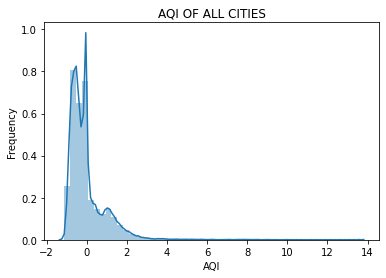

In [67]:
sns.distplot(data_clean.AQI)
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.title("AQI OF ALL CITIES")

Text(0.5, 1.0, 'NO LEVELS OF ALL CITIES')

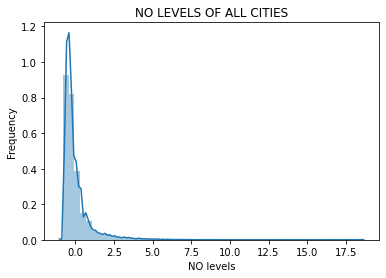

In [68]:
plt.style.use({'figure.facecolor':'white'})
sns.distplot(data_clean.NO)
plt.xlabel("NO levels")
plt.ylabel("Frequency")
plt.title("NO LEVELS OF ALL CITIES")

Text(0.5, 1.0, 'NO2 LEVELS OF ALL CITIES')

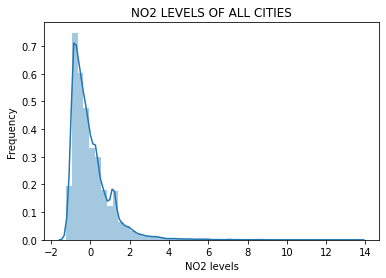

In [69]:
plt.style.use({'figure.facecolor':'white'})
sns.distplot(data_clean.NO2)
plt.xlabel("NO2 levels")
plt.ylabel("Frequency")
plt.title("NO2 LEVELS OF ALL CITIES")

Text(0.5, 1.0, 'NOx LEVELS OF ALL CITIES')

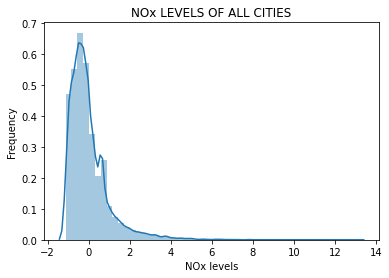

In [70]:
plt.style.use({'figure.facecolor':'white'})
sns.distplot(data_clean.NOx)
plt.xlabel("NOx levels")
plt.ylabel("Frequency")
plt.title("NOx LEVELS OF ALL CITIES")

Text(0.5, 1.0, 'SO2 LEVELS OF ALL CITIES')

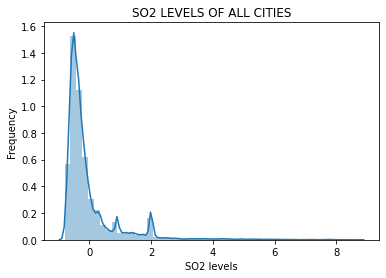

In [72]:
plt.style.use({'figure.facecolor':'white'})
sns.distplot(data_clean.SO2)
plt.xlabel("SO2 levels")
plt.ylabel("Frequency")
plt.title("SO2 LEVELS OF ALL CITIES")

Text(0.5, 1.0, 'O3 LEVELS OF ALL CITIES')

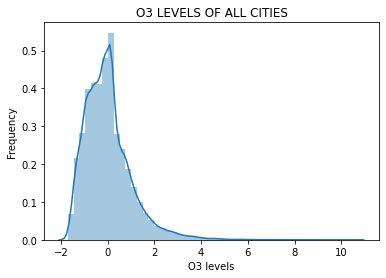

In [74]:
plt.style.use({'figure.facecolor':'white'})
sns.distplot(data_clean.O3)
plt.xlabel("O3 levels")
plt.ylabel("Frequency")
plt.title("O3 LEVELS OF ALL CITIES")